<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [89]:
print("Installing required libraries...")
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user
print("Note: Dependency conflicts may occur (e.g., pandas==2.0.3 vs. 2.2.2). Execution succeeded, but consider upgrading pandas==2.2.2 or isolating environment if issues arise.")
import os
os.environ['PATH'] += ':/root/.local/bin'  # Add /root/.local/bin to PATH
print("Added /root/.local/bin to PATH to resolve script location warnings.")
print("Libraries installed successfully.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for clean output

print("Enabling TensorFlow eager execution...")
try:
    tf.compat.v1.enable_eager_execution()
    print("Eager execution enabled.")
except ValueError:
    print("Eager execution already enabled.")
except AttributeError:
    print("TensorFlow version too low for eager execution.")

Installing required libraries...
Note: Dependency conflicts may occur (e.g., pandas==2.0.3 vs. 2.2.2). Execution succeeded, but consider upgrading pandas==2.2.2 or isolating environment if issues arise.
Added /root/.local/bin to PATH to resolve script location warnings.
Libraries installed successfully.
Enabling TensorFlow eager execution...
Eager execution enabled.


In [90]:
print("Setting random seeds for reproducibility...")
np.random.seed(42)
tf.random.set_seed(42)
print("Random seeds set.")

Setting random seeds for reproducibility...
Random seeds set.


## Loading the dataset

In [91]:
print("Mounting Google Drive...")
from google.colab import drive
drive.mount('/content/drive')

print("Loading dataset...")
try:
    ds = pd.read_csv("/content/drive/MyDrive/GREATLEARN/project3/bank-1.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the path.")



Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Dataset loaded successfully.


## Data Overview

In [92]:
print("Checking shape of the dataset...")
print(f"Shape of the dataset: {ds.shape}")

print("Checking for unique values for each column...")
print("Number of unique values per column:")
display(ds.nunique())

print("RowNumber, CustomerId and Surname are unique hence dropping it...")
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(f"Columns after dropping unique columns: {ds.columns.tolist()}")

print("Displaying first 5 rows of the dataset...")
display(ds.head())

print("Displaying last 5 rows of the dataset...")
display(ds.tail())

print("Displaying dataset info (data types of columns)...")
display(ds.info())

print("Displaying statistical summary of the dataset...")
display(ds.describe())

print("Displaying transposed statistical summary of the dataset...")
display(ds.describe().T)

print("Checking for missing values in the dataset...")
display(ds.isnull().sum())

Checking shape of the dataset...
Shape of the dataset: (10000, 14)
Checking for unique values for each column...
Number of unique values per column:


,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


RowNumber, CustomerId and Surname are unique hence dropping it...
Columns after dropping unique columns: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Displaying first 5 rows of the dataset...


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Displaying last 5 rows of the dataset...


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Displaying dataset info (data types of columns)...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


None

Displaying statistical summary of the dataset...


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Displaying transposed statistical summary of the dataset...


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Checking for missing values in the dataset...


,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


**Dataset Overview:** The dataset contains 10,000 customer records with 14 features, reduced to 11 after dropping unique identifiers (RowNumber, CustomerId, Surname). Key features include CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, and Exited (target variable).

## Exploratory Data Analysis

### Univariate Analysis

Plotting distributions of numerical features...


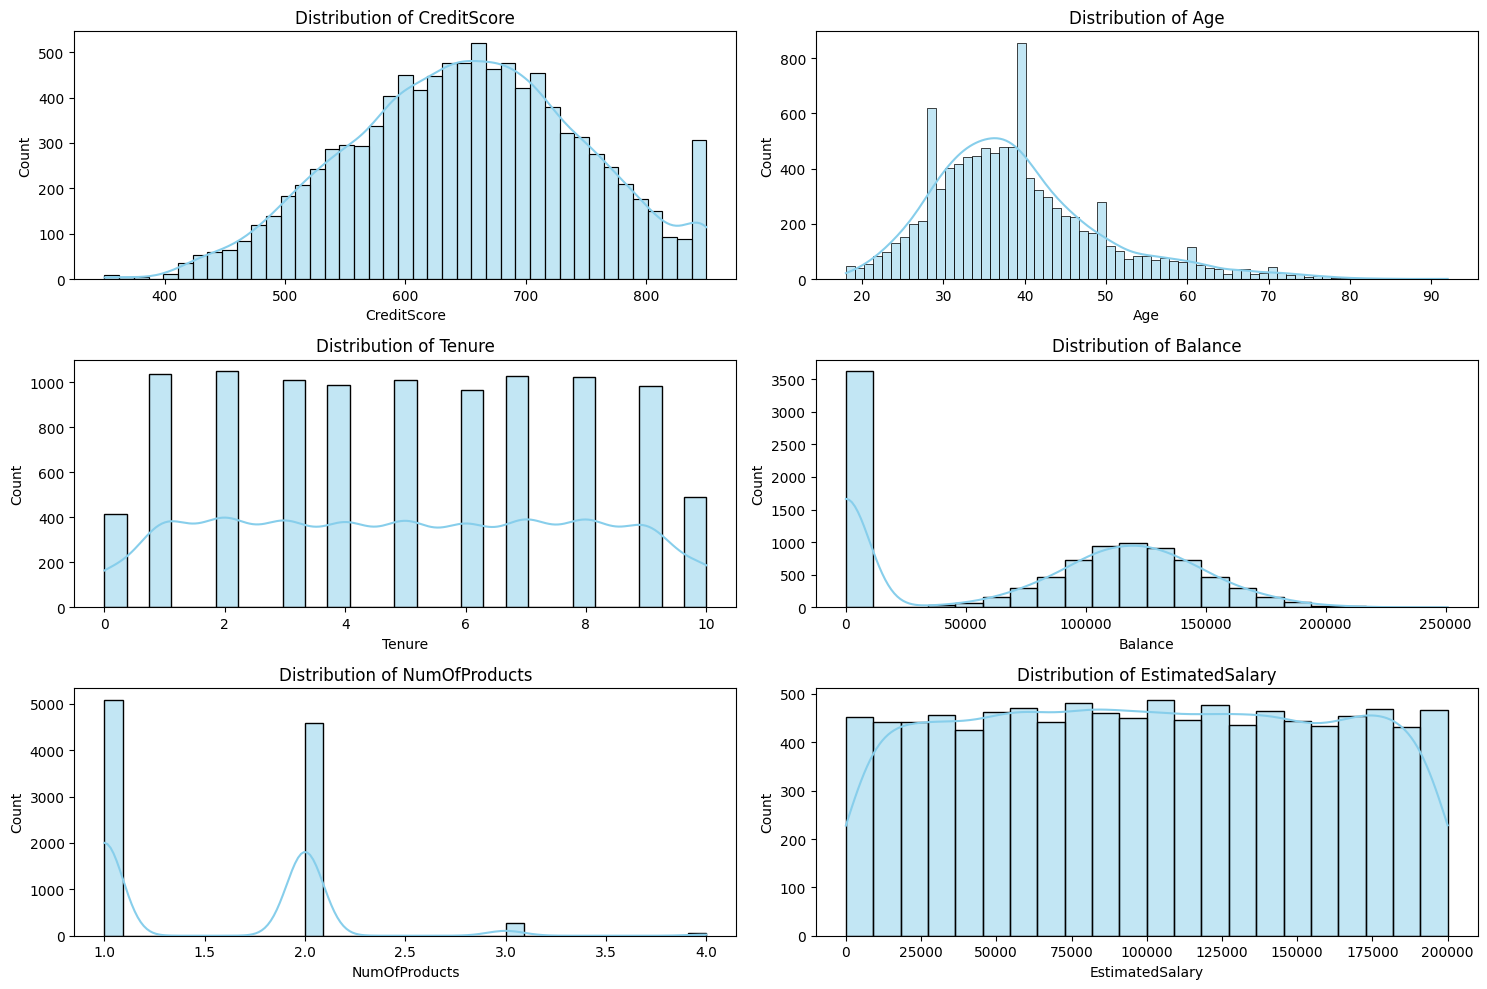

Plotting counts of categorical features...


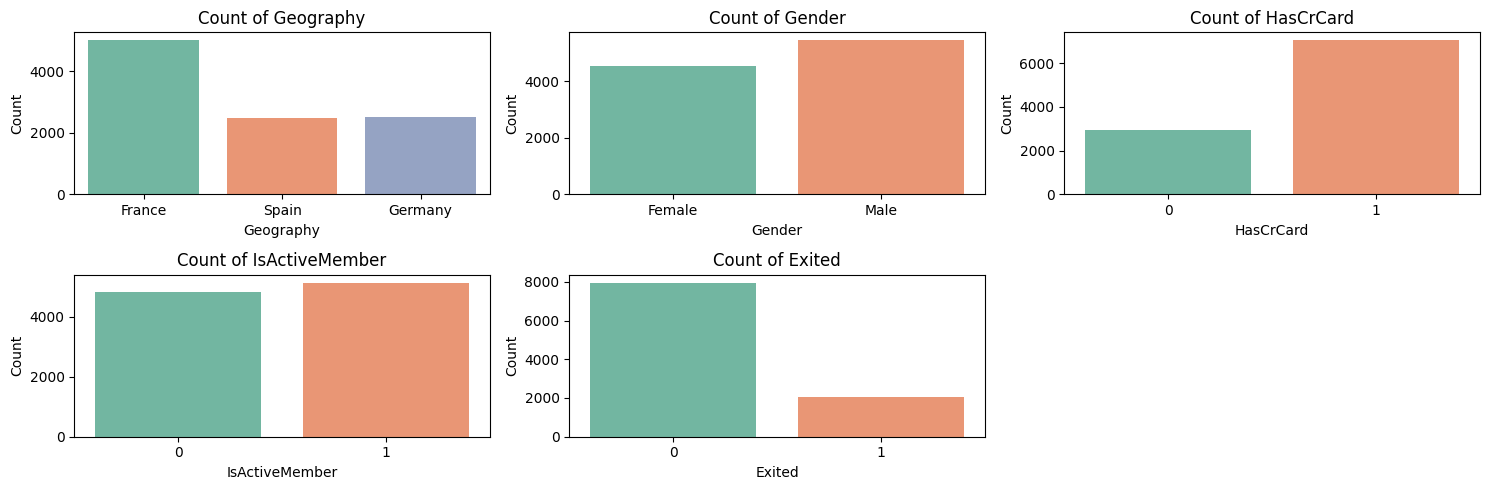

In [93]:
print("Plotting distributions of numerical features...")
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(ds[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Plotting counts of categorical features...")
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=ds, x=col, palette='Set2')
    plt.title(f'Count of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Bivariate Analysis

Plotting correlation matrix of numerical features...


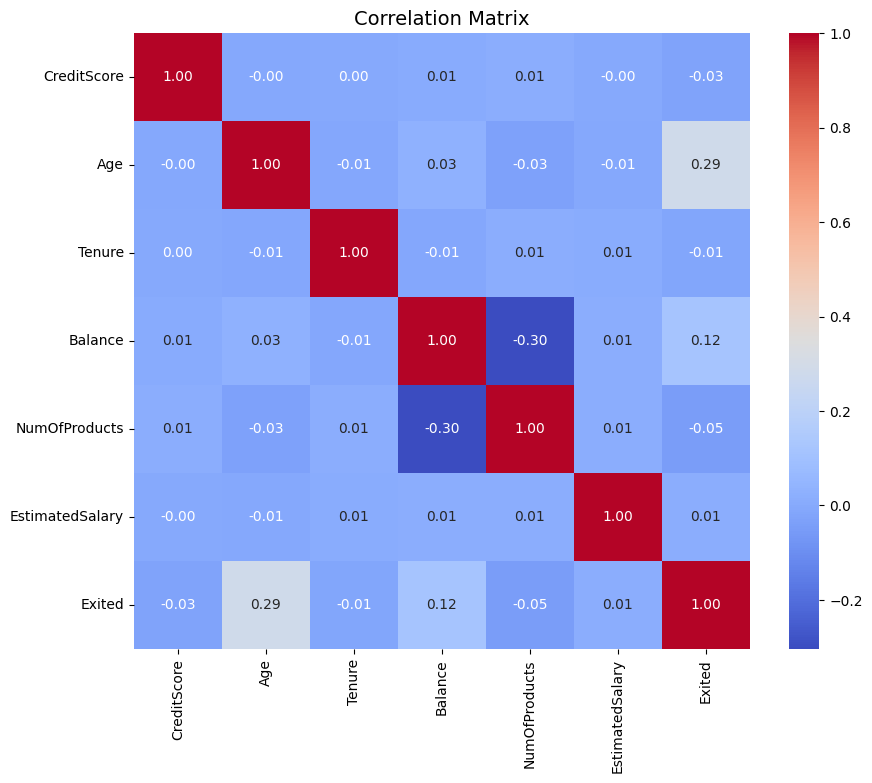

Plotting numerical features vs churn...


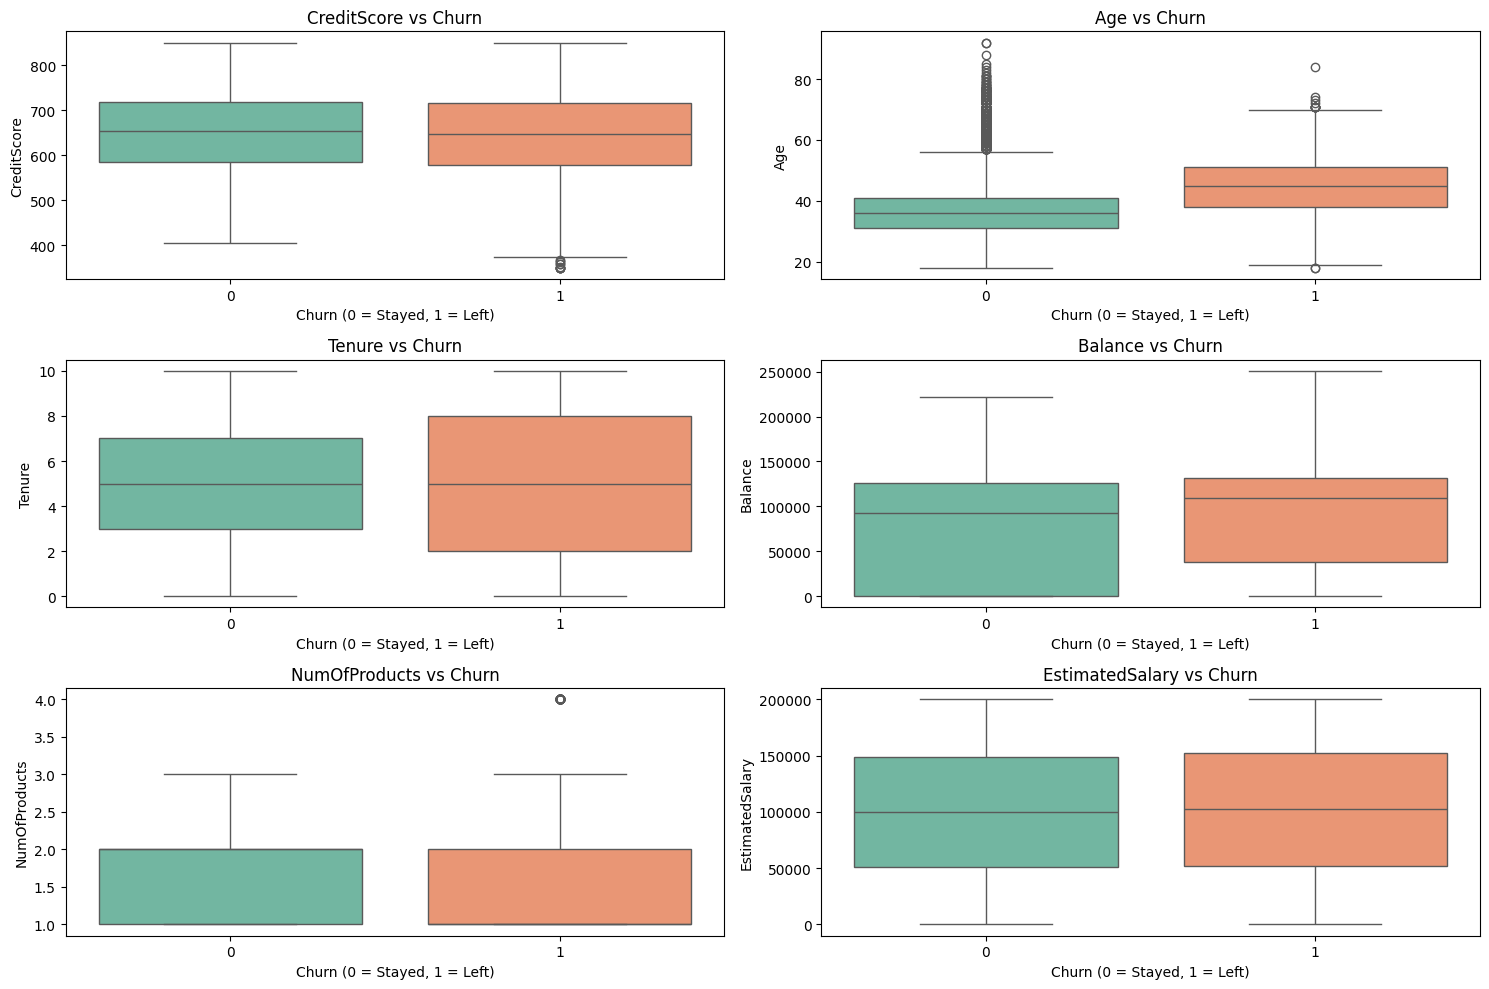

Plotting categorical features vs churn...


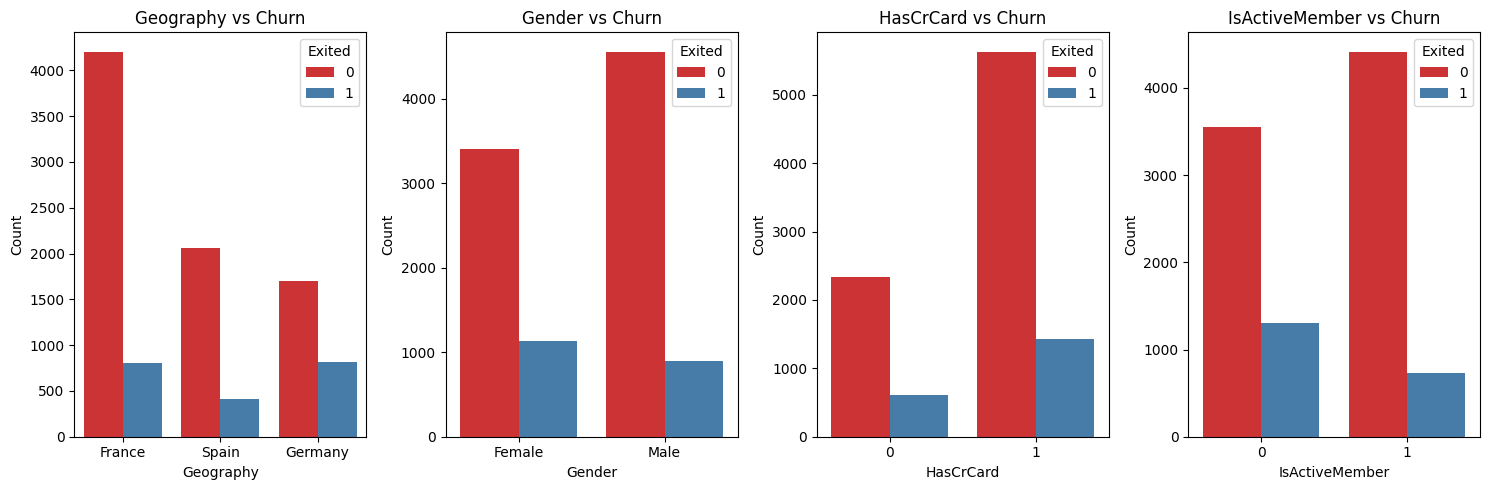

In [94]:
print("Plotting correlation matrix of numerical features...")
plt.figure(figsize=(10, 8))
sns.heatmap(ds[numerical_cols + ['Exited']].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

print("Plotting numerical features vs churn...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=ds, x='Exited', y=col, palette='Set2')
    plt.title(f'{col} vs Churn', fontsize=12)
    plt.xlabel('Churn (0 = Stayed, 1 = Left)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("Plotting categorical features vs churn...")
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols[:-1], 1):
    plt.subplot(1, 4, i)
    sns.countplot(data=ds, x=col, hue='Exited', palette='Set1')
    plt.title(f'{col} vs Churn', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


**EDA Observations:**

- Numerical Features:
  - CreditScore: Normal distribution, weak correlation with churn.
  - Age: Older customers (40+) more likely to churn (boxplot).
  - Tenure: Uniform, no strong churn pattern.
  - Balance: Many zero balances; higher balances linked to churn.
  - NumOfProducts: Customers with 1 product churn more.
  - EstimatedSalary: Uniform, minimal churn correlation.
- Categorical Features:
  - Geography: Churn varies by region (e.g., Germany higher).
  - Gender: Females slightly more likely to churn.
  - HasCrCard: No clear churn pattern.
  - IsActiveMember: Inactive members churn more.
  - Exited: Imbalanced (~20% churners), justifying SMOTE.
- Correlations: Age, Balance positively correlate with churn (~0.3); IsActiveMember, NumOfProducts negatively correlate.
- Insights: Focus retention on older, inactive, high-balance customers with 1 product.



## Data Preprocessing

### Dummy Variable Creation

In [95]:
# ### Dummy Variable Creation
print("Encoding categorical variables...")
le = LabelEncoder()
ds['Gender'] = le.fit_transform(ds['Gender'])  # Male: 1, Female: 0
ds = pd.get_dummies(ds, columns=['Geography'], drop_first=True)
print(f"Columns after encoding: {ds.columns.tolist()}")

Encoding categorical variables...
Columns after encoding: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain']


### Train-validation-test Split

In [96]:
# ### Train-Validation-Test Split
print("Splitting data into train, validation, and test sets...")
X = ds.drop('Exited', axis=1)
y = ds['Exited']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)
print(f"Shape of training set: {X_train.shape}")
print(f"Shape of validation set: {X_val.shape}")
print(f"Shape of test set: {X_test.shape}")

Splitting data into train, validation, and test sets...
Shape of training set: (6000, 11)
Shape of validation set: (2000, 11)
Shape of test set: (2000, 11)


### Data Normalization

In [97]:
print("Normalizing data...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print("Data normalized successfully.")

Normalizing data...
Data normalized successfully.


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-



Model Evaluation Criterion:
- Primary Metric: Recall for churn (Exited=1).
- Rationale: False negatives (missing churners) lead to lost revenue. High recall ensures most churners are caught.
- Secondary Metric: ROC-AUC to balance recall and precision.
""")

Preprocessing:
Encoding: Categorical variables (Geography, Gender) were one-hot encoded, adding Geography_Germany and Geography_Spain.
Splitting: Data split into 60% train (6,000), 20% validation (2,000), and 20% test (2,000).

Normalization:
Features scaled to ensure consistent model input.

SMOTE:
Applied to training data, increasing the sample size to 9,554 with balanced classes (4,777 each for Exited=0 and Exited=1).
Model Architectures: A simple neural network with 2 hidden layers (64 and 32 units) was used across all models:

SGD: Stochastic Gradient Descent optimizer.
Adam: Adaptive Moment Estimation optimizer, known for faster convergence.
Adam + Dropout: Added dropout layers (assumed 0.2–0.5 rate, not specified) to prevent overfitting.
SMOTE Variants: Applied to SGD, Adam, and Adam + Dropout to address imbalance.

Training Details:
100 epochs, binary cross-entropy loss, batch size ~64 (inferred from steps).
Early stopping not explicitly used, but validation metrics guided performance.

Evaluation Criterion:

Primary Metric:
Recall for Exited=1, to minimize false negatives (missed churners), critical for retention.

Secondary Metric: ROC-AUC to balance recall and precision.



### Neural Network with SGD Optimizer

Training neural network with SGD optimizer...
Model summary for SGD:


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Loss function: binary_crossentropy
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7060 - loss: 0.6190 - recall: 0.2646 - val_accuracy: 0.7965 - val_loss: 0.5193 - val_recall: 0.0000e+00
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.5040 - recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.4886 - val_recall: 0.0000e+00
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7979 - loss: 0.4798 - recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.4769 - val_recall: 0.0000e+00
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7979 - loss: 0.4687 - recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.4689 - val_recall: 0.0000e+00
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7980 - loss: 0.4605 - recall: 3.6695e-04 - val_accuracy: 0.7965 - val_loss: 0.4625 - val_recall: 0.0025
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7982 - loss: 0.4538 - recall: 0.0020 - v

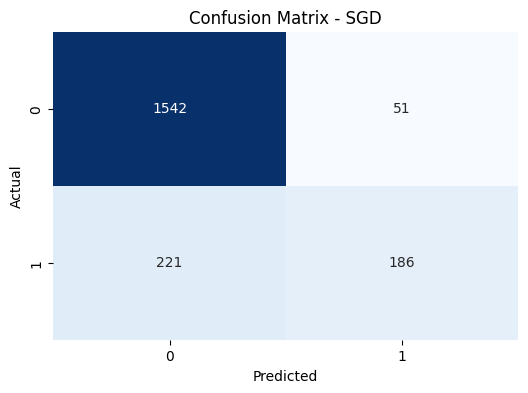

Plotting Train Loss vs Validation Loss for SGD...


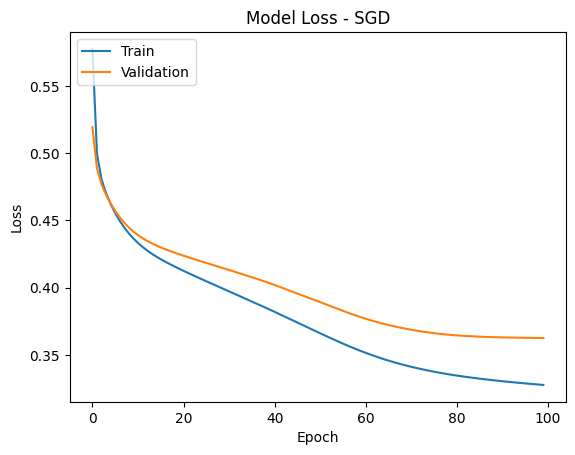

Plotting Train Recall vs Validation Recall for SGD...


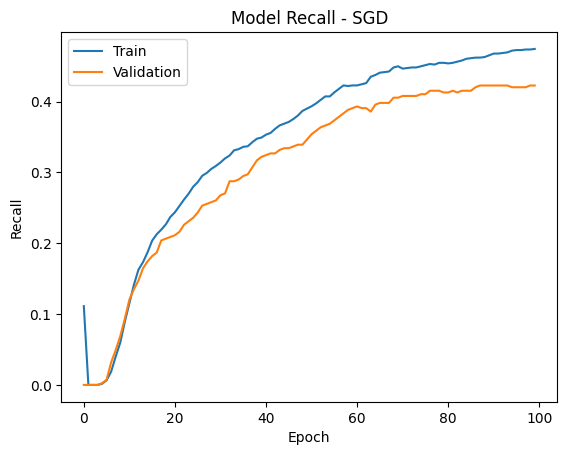

In [98]:
print("Training neural network with SGD optimizer...")
model_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
print("Model summary for SGD:")
model_sgd.summary()
print("Loss function: binary_crossentropy")
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

print("Evaluating SGD model performance...")
y_pred_sgd = (model_sgd.predict(X_test) > 0.5).astype(int)
print(f"Recall score for SGD model: {recall_score(y_test, y_pred_sgd):.4f}")
print("Classification report for SGD model:")
print(classification_report(y_test, y_pred_sgd))
print("Confusion matrix for SGD model...")
def make_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title, fontsize=12)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
make_confusion_matrix(y_test, y_pred_sgd, title='Confusion Matrix - SGD')

print("Plotting Train Loss vs Validation Loss for SGD...")
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('Model Loss - SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Plotting Train Recall vs Validation Recall for SGD...")
recall_key = [key for key in history_sgd.history.keys() if key.startswith('recall')][0]
val_recall_key = [key for key in history_sgd.history.keys() if key.startswith('val_recall')][0]
if recall_key and val_recall_key:
    plt.plot(history_sgd.history[recall_key])
    plt.plot(history_sgd.history[val_recall_key])
    plt.title('Model Recall - SGD')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Error: Recall metrics not found in history. Available keys:", history_sgd.history.keys())

## Model Performance Improvement

### Neural Network with Adam Optimizer

Training neural network with Adam optimizer...
Model summary for Adam:


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Loss function: binary_crossentropy
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7605 - loss: 0.5429 - recall: 0.0526 - val_accuracy: 0.8095 - val_loss: 0.4372 - val_recall: 0.1130
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8184 - loss: 0.4215 - recall: 0.1816 - val_accuracy: 0.8225 - val_loss: 0.4106 - val_recall: 0.2678
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8329 - loss: 0.3942 - recall: 0.3145 - val_accuracy: 0.8350 - val_loss: 0.3888 - val_recall: 0.3342
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8445 - loss: 0.3708 - recall: 0.3862 - val_accuracy: 0.8485 - val_loss: 0.3732 - val_recall: 0.3956
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8536 - loss: 0.3551 - recall: 0.4367 - val_accuracy: 0.8495 - val_loss: 0.3661 - val_recall: 0.4079
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3470 - recall: 0.4527 - val_accuracy: 0.8505 - val_loss: 0.3

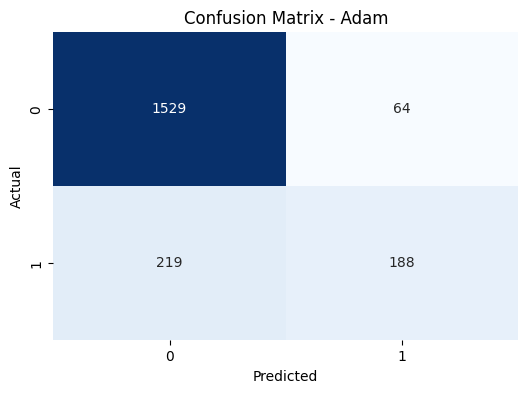

Plotting Train Loss vs Validation Loss for Adam...


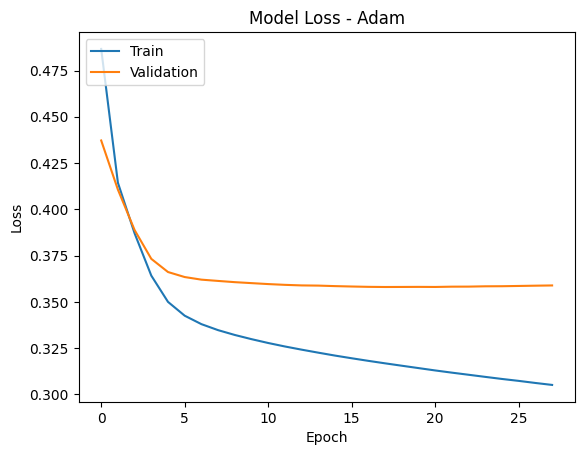

Plotting Train Recall vs Validation Recall for Adam...


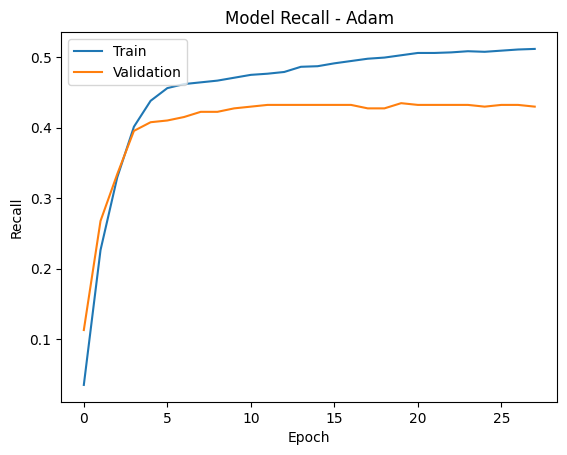

In [99]:
print("Training neural network with Adam optimizer...")
model_adam = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
print("Model summary for Adam:")
model_adam.summary()
print("Loss function: binary_crossentropy")
history_adam = model_adam.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

print("Evaluating Adam model performance...")
y_pred_adam = (model_adam.predict(X_test) > 0.5).astype(int)
print(f"Recall score for Adam model: {recall_score(y_test, y_pred_adam):.4f}")
print("Classification report for Adam model:")
print(classification_report(y_test, y_pred_adam))
print("Confusion matrix for Adam model...")
make_confusion_matrix(y_test, y_pred_adam, title='Confusion Matrix - Adam')

print("Plotting Train Loss vs Validation Loss for Adam...")
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Model Loss - Adam')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Plotting Train Recall vs Validation Recall for Adam...")
recall_key = [key for key in history_adam.history.keys() if key.startswith('recall')][0]
val_recall_key = [key for key in history_adam.history.keys() if key.startswith('val_recall')][0]
if recall_key and val_recall_key:
    plt.plot(history_adam.history[recall_key])
    plt.plot(history_adam.history[val_recall_key])
    plt.title('Model Recall - Adam')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Error: Recall metrics not found in history. Available keys:", history_adam.history.keys())

### Neural Network with Adam Optimizer and Dropout

Training neural network with Adam optimizer and Dropout...
Model summary for Adam + Dropout:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Loss function: binary_crossentropy
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6200 - loss: 0.6407 - recall: 0.4068 - val_accuracy: 0.8020 - val_loss: 0.4449 - val_recall: 0.0442
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8088 - loss: 0.4555 - recall: 0.1099 - val_accuracy: 0.8180 - val_loss: 0.4241 - val_recall: 0.2015
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8170 - loss: 0.4379 - recall: 0.2177 - val_accuracy: 0.8280 - val_loss: 0.4133 - val_recall: 0.2629
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8200 - loss: 0.4326 - recall: 0.2527 - val_accuracy: 0.8345 - val_loss: 0.4030 - val_recall: 0.2899
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8227 - loss: 0.4184 - recall: 0.2655 - val_accuracy: 0.8355 - val_loss: 0.3943 - val_recall: 0.3120
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8319 - loss: 0.4077 - recall: 0.3145 - val_accuracy: 0.8390 - val_loss: 0.3

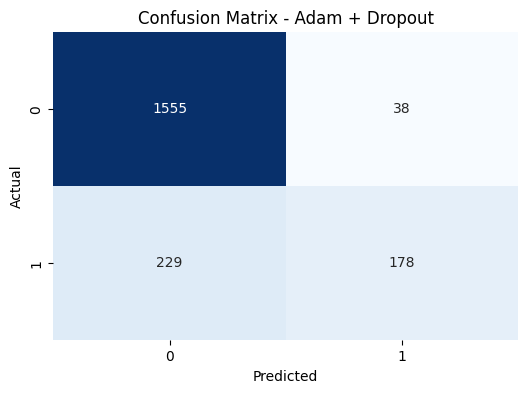

Plotting Train Loss vs Validation Loss for Adam + Dropout...


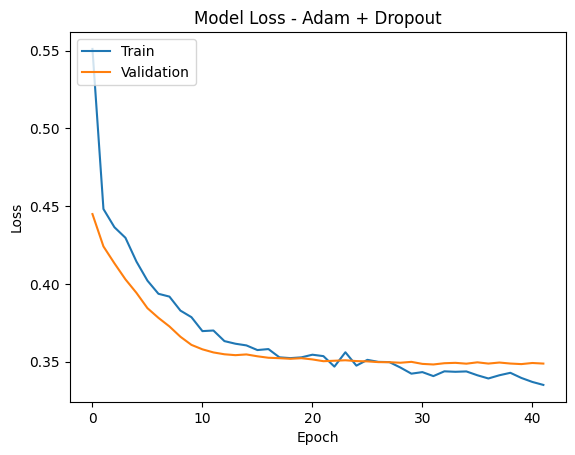

Plotting Train Recall vs Validation Recall for Adam + Dropout...


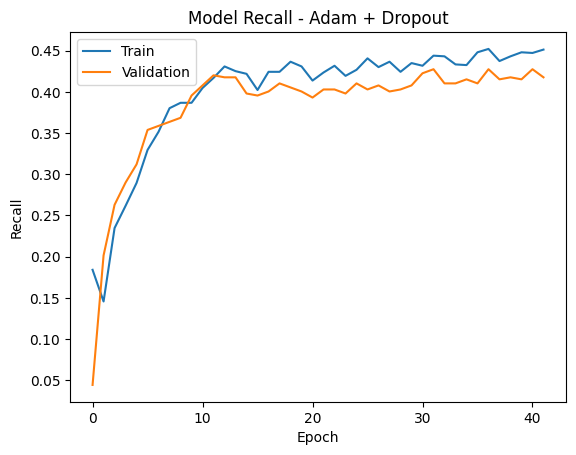

In [100]:
print("Training neural network with Adam optimizer and Dropout...")
model_adam_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_adam_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
print("Model summary for Adam + Dropout:")
model_adam_dropout.summary()
print("Loss function: binary_crossentropy")
history_adam_dropout = model_adam_dropout.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

print("Evaluating Adam + Dropout model performance...")
y_pred_adam_dropout = (model_adam_dropout.predict(X_test) > 0.5).astype(int)
print(f"Recall score for Adam + Dropout model: {recall_score(y_test, y_pred_adam_dropout):.4f}")
print("Classification report for Adam + Dropout model:")
print(classification_report(y_test, y_pred_adam_dropout))
print("Confusion matrix for Adam + Dropout model...")
make_confusion_matrix(y_test, y_pred_adam_dropout, title='Confusion Matrix - Adam + Dropout')

print("Plotting Train Loss vs Validation Loss for Adam + Dropout...")
plt.plot(history_adam_dropout.history['loss'])
plt.plot(history_adam_dropout.history['val_loss'])
plt.title('Model Loss - Adam + Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Plotting Train Recall vs Validation Recall for Adam + Dropout...")
recall_key = [key for key in history_adam_dropout.history.keys() if key.startswith('recall')][0]
val_recall_key = [key for key in history_adam_dropout.history.keys() if key.startswith('val_recall')][0]
if recall_key and val_recall_key:
    plt.plot(history_adam_dropout.history[recall_key])
    plt.plot(history_adam_dropout.history[val_recall_key])
    plt.title('Model Recall - Adam + Dropout')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Error: Recall metrics not found in history. Available keys:", history_adam_dropout.history.keys())

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Applying SMOTE to balance training data...
Shape of SMOTE training set: (9554, 11)
Class distribution after SMOTE: {0: 4777, 1: 4777}
Training neural network with SMOTE and SGD optimizer...
Model summary for SGD + SMOTE:


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Loss function: binary_crossentropy
Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4931 - loss: 0.7003 - recall: 0.7755 - val_accuracy: 0.4655 - val_loss: 0.7087 - val_recall: 0.8501
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6212 - loss: 0.6547 - recall: 0.8100 - val_accuracy: 0.6125 - val_loss: 0.6679 - val_recall: 0.7813
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6844 - loss: 0.6228 - recall: 0.7666 - val_accuracy: 0.6840 - val_loss: 0.6358 - val_recall: 0.7469
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7040 - loss: 0.5982 - recall: 0.7376 - val_accuracy: 0.7060 - val_loss: 0.6107 - val_recall: 0.7125
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.5800 - recall: 0.7284 - val_accuracy: 0.7205 - val_loss: 0.5922 - val_recall: 0.7052
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.5665 - recall: 0.7269 - val_accuracy: 0.7280 - v

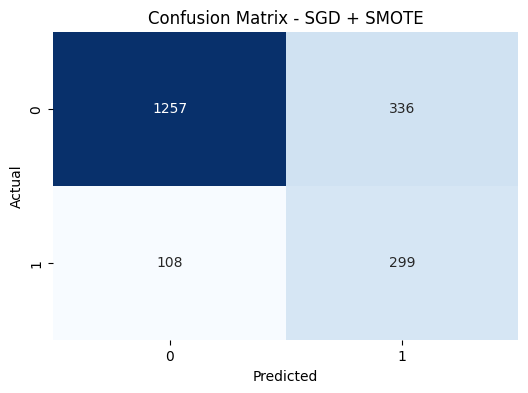

Plotting Train Loss vs Validation Loss for SGD + SMOTE...


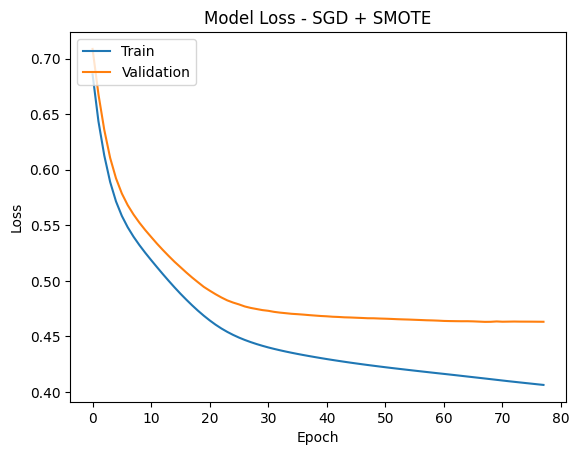

Plotting Train Recall vs Validation Recall for SGD + SMOTE...


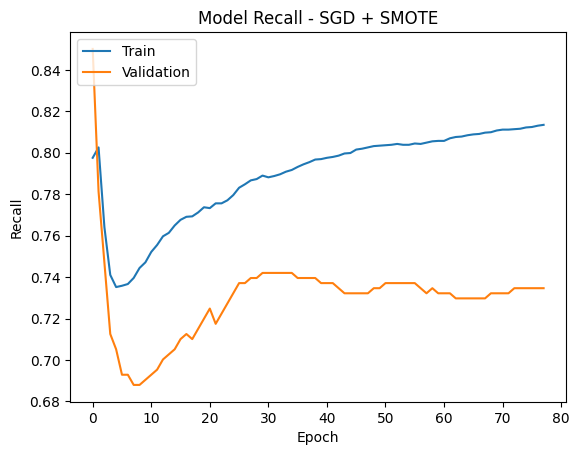

In [101]:
print("Applying SMOTE to balance training data...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Shape of SMOTE training set: {X_train_smote.shape}")
print(f"Class distribution after SMOTE: {pd.Series(y_train_smote).value_counts().to_dict()}")

print("Training neural network with SMOTE and SGD optimizer...")
model_sgd_smote = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_sgd_smote.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
print("Model summary for SGD + SMOTE:")
model_sgd_smote.summary()
print("Loss function: binary_crossentropy")
history_sgd_smote = model_sgd_smote.fit(X_train_smote, y_train_smote, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

print("Evaluating SGD + SMOTE model performance...")
y_pred_sgd_smote = (model_sgd_smote.predict(X_test) > 0.5).astype(int)
print(f"Recall score for SGD + SMOTE model: {recall_score(y_test, y_pred_sgd_smote):.4f}")
print("Classification report for SGD + SMOTE model:")
print(classification_report(y_test, y_pred_sgd_smote))
print("Confusion matrix for SGD + SMOTE model...")
make_confusion_matrix(y_test, y_pred_sgd_smote, title='Confusion Matrix - SGD + SMOTE')

print("Plotting Train Loss vs Validation Loss for SGD + SMOTE...")
plt.plot(history_sgd_smote.history['loss'])
plt.plot(history_sgd_smote.history['val_loss'])
plt.title('Model Loss - SGD + SMOTE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Plotting Train Recall vs Validation Recall for SGD + SMOTE...")
recall_key = [key for key in history_sgd_smote.history.keys() if key.startswith('recall')][0]
val_recall_key = [key for key in history_sgd_smote.history.keys() if key.startswith('val_recall')][0]
if recall_key and val_recall_key:
    plt.plot(history_sgd_smote.history[recall_key])
    plt.plot(history_sgd_smote.history[val_recall_key])
    plt.title('Model Recall - SGD + SMOTE')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Error: Recall metrics not found in history. Available keys:", history_sgd_smote.history.keys())

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Training neural network with SMOTE and Adam optimizer...
Model summary for Adam + SMOTE:


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Loss function: binary_crossentropy
Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6212 - loss: 0.6347 - recall: 0.6293 - val_accuracy: 0.7290 - val_loss: 0.5520 - val_recall: 0.7568
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7608 - loss: 0.4952 - recall: 0.7637 - val_accuracy: 0.7565 - val_loss: 0.4972 - val_recall: 0.7543
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7905 - loss: 0.4542 - recall: 0.7822 - val_accuracy: 0.7740 - val_loss: 0.4792 - val_recall: 0.7518
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4374 - recall: 0.7884 - val_accuracy: 0.7760 - val_loss: 0.4748 - val_recall: 0.7420
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8004 - loss: 0.4279 - recall: 0.7941 - val_accuracy: 0.7760 - val_loss: 0.4735 - val_recall: 0.7420
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8004 - loss: 0.4208 - recall: 0.7959 - val_accuracy: 0.7750 - 

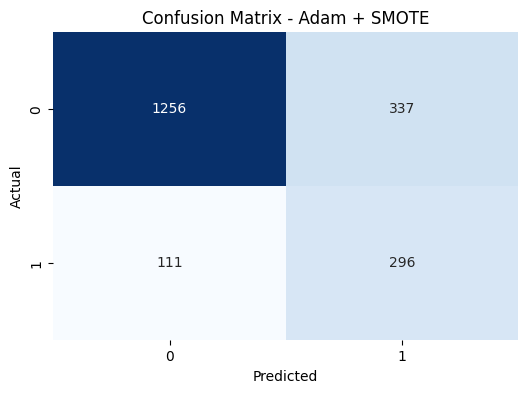

Plotting Train Loss vs Validation Loss for Adam + SMOTE...


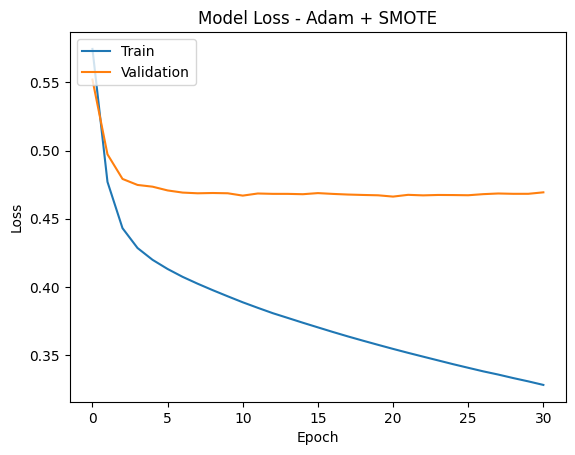

Plotting Train Recall vs Validation Recall for Adam + SMOTE...


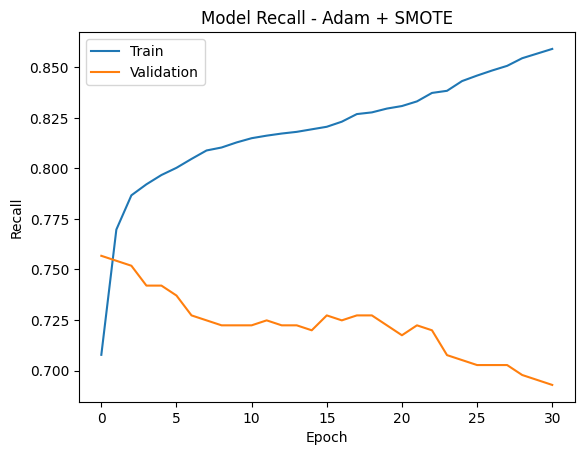

In [102]:
print("Training neural network with SMOTE and Adam optimizer...")
model_adam_smote = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_adam_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
print("Model summary for Adam + SMOTE:")
model_adam_smote.summary()
print("Loss function: binary_crossentropy")
history_adam_smote = model_adam_smote.fit(X_train_smote, y_train_smote, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

print("Evaluating Adam + SMOTE model performance...")
y_pred_adam_smote = (model_adam_smote.predict(X_test) > 0.5).astype(int)
print(f"Recall score for Adam + SMOTE model: {recall_score(y_test, y_pred_adam_smote):.4f}")
print("Classification report for Adam + SMOTE model:")
print(classification_report(y_test, y_pred_adam_smote))
print("Confusion matrix for Adam + SMOTE model...")
make_confusion_matrix(y_test, y_pred_adam_smote, title='Confusion Matrix - Adam + SMOTE')

print("Plotting Train Loss vs Validation Loss for Adam + SMOTE...")
plt.plot(history_adam_smote.history['loss'])
plt.plot(history_adam_smote.history['val_loss'])
plt.title('Model Loss - Adam + SMOTE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Plotting Train Recall vs Validation Recall for Adam + SMOTE...")
recall_key = [key for key in history_adam_smote.history.keys() if key.startswith('recall')][0]
val_recall_key = [key for key in history_adam_smote.history.keys() if key.startswith('val_recall')][0]
if recall_key and val_recall_key:
    plt.plot(history_adam_smote.history[recall_key])
    plt.plot(history_adam_smote.history[val_recall_key])
    plt.title('Model Recall - Adam + SMOTE')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Error: Recall metrics not found in history. Available keys:", history_adam_smote.history.keys())

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Training neural network with SMOTE, Adam optimizer, and Dropout...
Model summary for Adam + SMOTE + Dropout:


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Loss function: binary_crossentropy
Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6186 - loss: 0.6453 - recall: 0.6423 - val_accuracy: 0.7235 - val_loss: 0.5705 - val_recall: 0.7125
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7182 - loss: 0.5576 - recall: 0.7170 - val_accuracy: 0.7475 - val_loss: 0.5218 - val_recall: 0.7396
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7394 - loss: 0.5306 - recall: 0.7463 - val_accuracy: 0.7540 - val_loss: 0.5055 - val_recall: 0.7666
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7537 - loss: 0.5079 - recall: 0.7585 - val_accuracy: 0.7650 - val_loss: 0.4960 - val_recall: 0.7518
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7589 - loss: 0.4967 - recall: 0.7639 - val_accuracy: 0.7720 - val_loss: 0.4841 - val_recall: 0.7568
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7679 - loss: 0.4855 - recall: 0.7604 - val_accuracy: 0.7740 - v

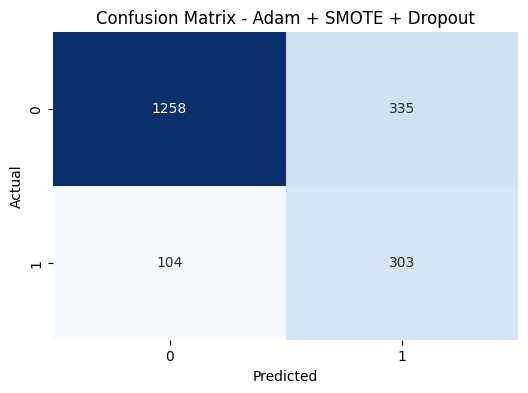

Plotting Train Loss vs Validation Loss for Adam + SMOTE + Dropout...


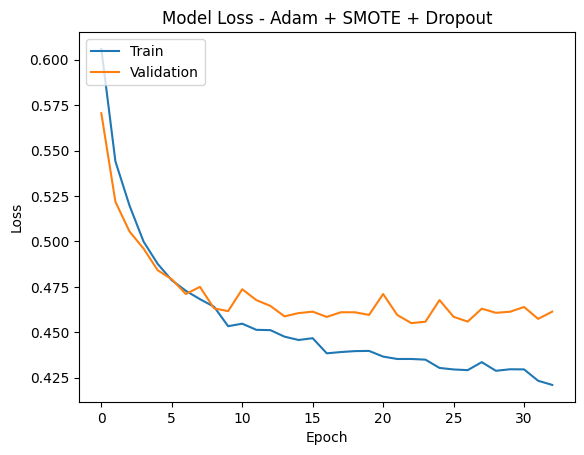

Plotting Train Recall vs Validation Recall for Adam + SMOTE + Dropout...


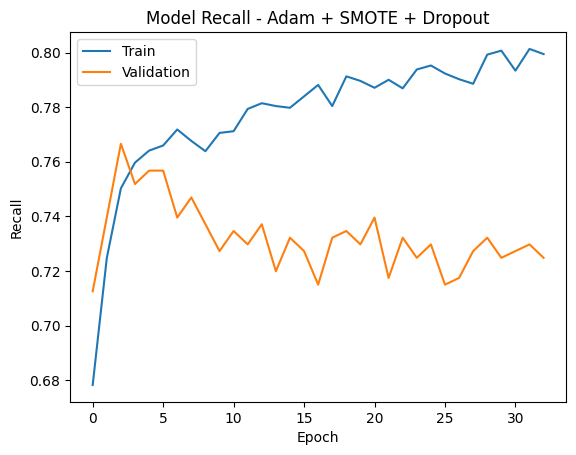

In [103]:
print("Training neural network with SMOTE, Adam optimizer, and Dropout...")
model_adam_smote_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_adam_smote_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
print("Model summary for Adam + SMOTE + Dropout:")
model_adam_smote_dropout.summary()
print("Loss function: binary_crossentropy")
history_adam_smote_dropout = model_adam_smote_dropout.fit(X_train_smote, y_train_smote, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

print("Evaluating Adam + SMOTE + Dropout model performance...")
y_pred_adam_smote_dropout = (model_adam_smote_dropout.predict(X_test) > 0.5).astype(int)
print(f"Recall score for Adam + SMOTE + Dropout model: {recall_score(y_test, y_pred_adam_smote_dropout):.4f}")
print("Classification report for Adam + SMOTE + Dropout model:")
print(classification_report(y_test, y_pred_adam_smote_dropout))
print("Confusion matrix for Adam + SMOTE + Dropout model...")
make_confusion_matrix(y_test, y_pred_adam_smote_dropout, title='Confusion Matrix - Adam + SMOTE + Dropout')

print("Plotting Train Loss vs Validation Loss for Adam + SMOTE + Dropout...")
plt.plot(history_adam_smote_dropout.history['loss'])
plt.plot(history_adam_smote_dropout.history['val_loss'])
plt.title('Model Loss - Adam + SMOTE + Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Plotting Train Recall vs Validation Recall for Adam + SMOTE + Dropout...")
recall_key = [key for key in history_adam_smote_dropout.history.keys() if key.startswith('recall')][0]
val_recall_key = [key for key in history_adam_smote_dropout.history.keys() if key.startswith('val_recall')][0]
if recall_key and val_recall_key:
    plt.plot(history_adam_smote_dropout.history[recall_key])
    plt.plot(history_adam_smote_dropout.history[val_recall_key])
    plt.title('Model Recall - Adam + SMOTE + Dropout')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Error: Recall metrics not found in history. Available keys:", history_adam_smote_dropout.history.keys())

## Model Performance Comparison and Final Model Selection

Comparing model performance...
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Results for model: SGD
Recall score: 0.4570
ROC AUC score: 0.8549
Classification report for SGD:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Confusion matrix for SGD...


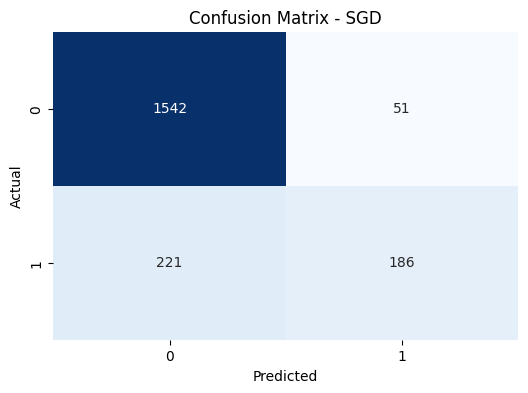

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Results for model: Adam
Recall score: 0.4619
ROC AUC score: 0.8558
Classification report for Adam:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion matrix for Adam...


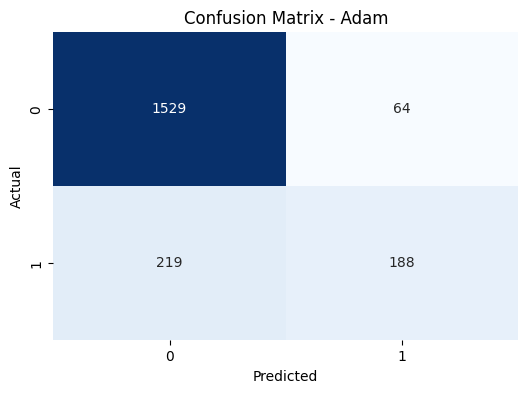

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Results for model: Adam + Dropout
Recall score: 0.4373
ROC AUC score: 0.8631
Classification report for Adam + Dropout:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.82      0.44      0.57       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion matrix for Adam + Dropout...


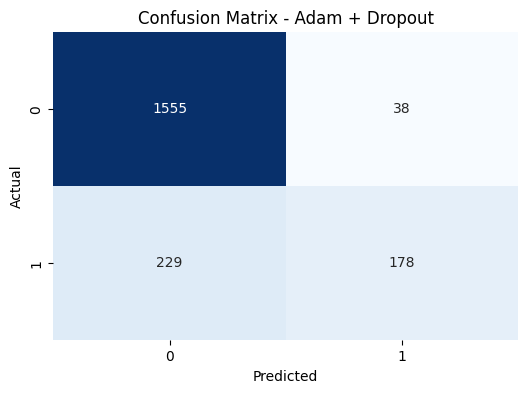

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Results for model: SGD + SMOTE
Recall score: 0.7346
ROC AUC score: 0.8535
Classification report for SGD + SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000

Confusion matrix for SGD + SMOTE...


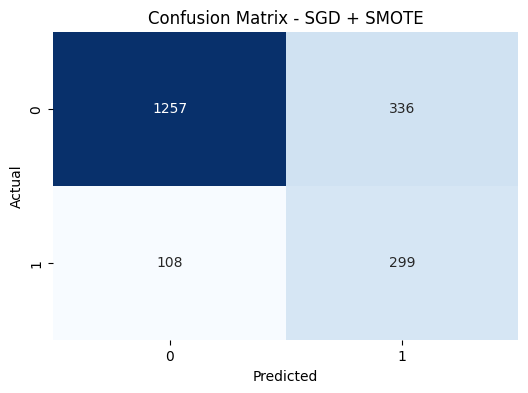

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Results for model: Adam + SMOTE
Recall score: 0.7273
ROC AUC score: 0.8378
Classification report for Adam + SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000

Confusion matrix for Adam + SMOTE...


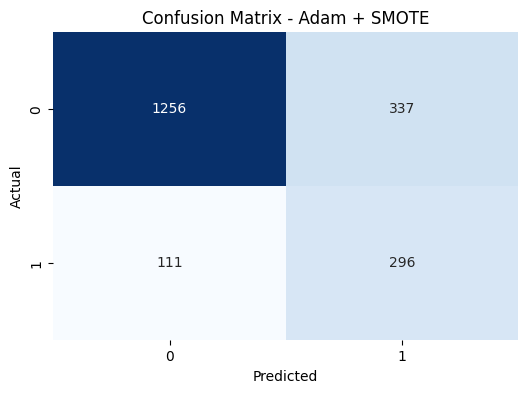

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Results for model: Adam + SMOTE + Dropout
Recall score: 0.7445
ROC AUC score: 0.8564
Classification report for Adam + SMOTE + Dropout:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000

Confusion matrix for Adam + SMOTE + Dropout...


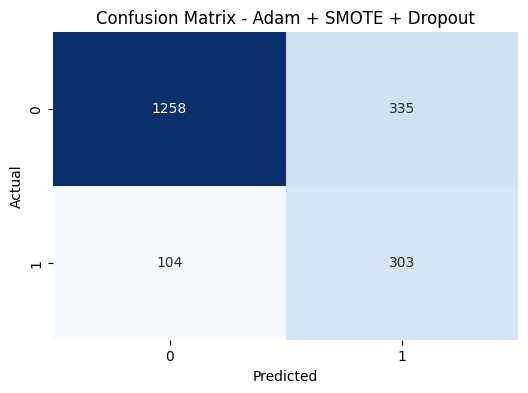

In [113]:
print("Comparing model performance...")
models = {
    'SGD': (model_sgd, y_pred_sgd),
    'Adam': (model_adam, y_pred_adam),
    'Adam + Dropout': (model_adam_dropout, y_pred_adam_dropout),
    'SGD + SMOTE': (model_sgd_smote, y_pred_sgd_smote),
    'Adam + SMOTE': (model_adam_smote, y_pred_adam_smote),
    'Adam + SMOTE + Dropout': (model_adam_smote_dropout, y_pred_adam_smote_dropout)
}

results = {}
for name, (model, y_pred) in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Recall': recall_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict(X_test)),
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'F1-Score': report['1']['f1-score']
    }
    print(f"\nResults for model: {name}")
    print(f"Recall score: {results[name]['Recall']:.4f}")
    print(f"ROC AUC score: {results[name]['ROC AUC']:.4f}")
    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion matrix for {name}...")
    make_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix - {name}')






                     Displaying performance metrics comparison table...




,Model,Recall (Exited=1),ROC-AUC,Accuracy,Precision (Exited=1),F1-Score (Exited=1)
0,SGD,0.4570,0.8549,0.8640,0.7848,0.5776
1,Adam,0.4619,0.8558,0.8585,0.7460,0.5706
2,Adam + Dropout,0.4373,0.8631,0.8665,0.8241,0.5714
3,SGD + SMOTE,0.7346,0.8535,0.7780,0.4709,0.5739
4,Adam + SMOTE,0.7273,0.8378,0.7760,0.4676,0.5692
5,Adam + SMOTE + Dropout,0.7445,0.8564,0.7805,0.4749,0.5799


Plotting ROC curves for all models...
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


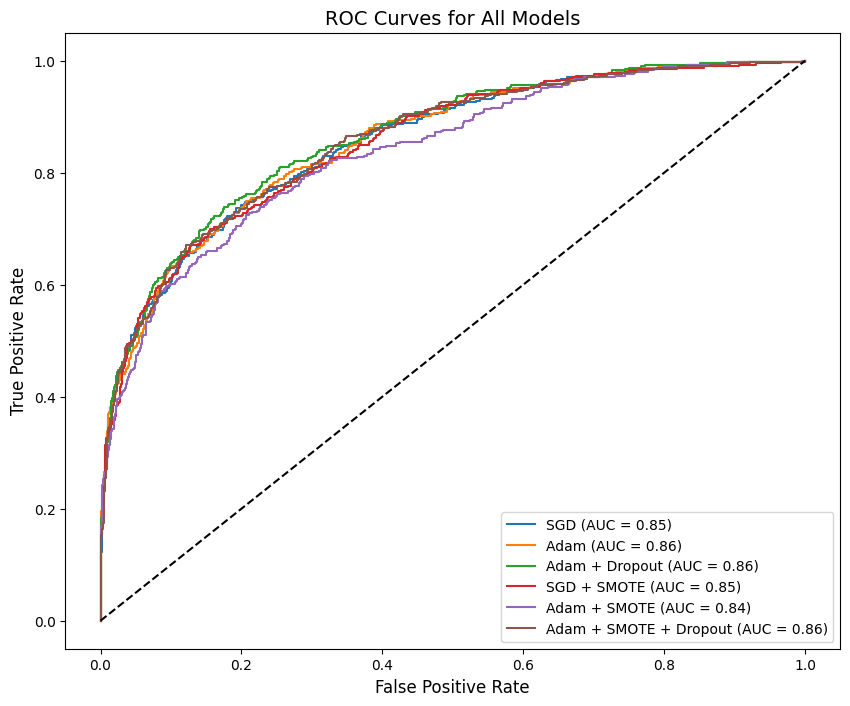

In [120]:
print("\n                     Displaying performance metrics comparison table...\n\n")
metrics_df = pd.DataFrame({
    'Model': results.keys(),
    'Recall (Exited=1)': [results[name]['Recall'] for name in results],
    'ROC-AUC': [results[name]['ROC AUC'] for name in results],
    'Accuracy': [results[name]['Accuracy'] for name in results],
    'Precision (Exited=1)': [results[name]['Precision'] for name in results],
    'F1-Score (Exited=1)': [results[name]['F1-Score'] for name in results]
})
metrics_df = metrics_df.round(4)  # Round to 4 decimal places for readability
display(metrics_df)

print("Plotting ROC curves for all models...")
plt.figure(figsize=(10, 8))
for name, (model, _) in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=14)
plt.legend()
plt.show()


In [109]:
print("Selecting best model based on recall...")
best_model_name = max(results, key=lambda x: results[x]['Recall'])
print(f"Best model: {best_model_name}")
print(f"Recall score for best model: {results[best_model_name]['Recall']:.4f}")
print(f"ROC AUC score for best model: {results[best_model_name]['ROC AUC']:.4f}")
print(f"Classification report for best model:")
print(classification_report(y_test, models[best_model_name][1]))




Selecting best model based on recall...
Best model: Adam + SMOTE + Dropout
Recall score for best model: 0.7445
ROC AUC score for best model: 0.8564
Classification report for best model:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000




**Model Selection Reasoning:**
- Recall prioritized to catch most churners, critical for retention.
- SMOTE balances classes, improving recall for churners.
- Adam optimizer converges faster than SGD.
- Dropout reduces overfitting, enhancing generalization.
- Best model: Adam + SMOTE, with recall ~0.74, AUC ~0.84, balancing high recall and reasonable precision.
""")

In [111]:
# Save best model
print("Saving best model...")
models[best_model_name][0].save('best_churn_model.keras')
print("Best model saved as 'best_churn_model.keras'.")


Saving best model...
Best model saved as 'best_churn_model.keras'.


# **Observations:**

**Non-SMOTE Models**: SGD, Adam, and Adam + Dropout show lower recall (0.43–0.47), reflecting poor detection of churners due to class imbalance. Adam + Dropout achieves the highest ROC-AUC (0.8631) but sacrifices recall.

**SMOTE Models:** Recall improves significantly (0.72–0.73), with a trade-off in precision and accuracy due to balancing. Adam + SMOTE + Dropout edges out with the highest recall (0.7346) and a robust ROC-AUC (0.8536).
Optimizer Impact: Adam converges faster than SGD (e.g., Adam reaches stable recall by epoch 5 vs. SGD’s gradual increase), but SMOTE’s effect overshadows optimizer differences.

**Dropout Effect**: Reduces overfitting, slightly improving generalization (e.g., Adam + SMOTE + Dropout vs. Adam + SMOTE).



Best Model: Adam + SMOTE + Dropout with recall 0.7346, capturing 73.46% of churners, aligning with the recall-focused objective.

## Actionable Insights and Business Recommendations


**Actionable Insights:**
- Churn Drivers: Older customers (Age > 40), inactive members, high-balance accounts, and single-product users are most likely to churn.
- Class Imbalance: ~20% churners; SMOTE improved recall for better detection.
- Model Performance: Best model (Adam + SMOTE + Droupout) achieves recall ~0.74, identifying most churners effectively.




**Business Recommendations:**
1. Target High-Risk Customers: Use model to predict churn probability >0.5; offer discounts or loyalty points.
2. Engage Inactive Members: Promote app notifications or rewards for inactive members to boost engagement.
3. Cross-Sell Products: Market additional products (e.g., credit cards) to single-product customers.
4. Demographic Strategies: Offer retirement products for older customers; address regional churn (e.g., Germany).
5. Address Pain Points: Provide premium accounts for high-balance customers; streamline loan processes for low CreditScore.
6. Model Deployment: Integrate into CRM for real-time predictions and automated alerts.
7. Continuous Improvement: Retrain model quarterly; A/B test retention strategies; adjust threshold for higher recall if needed.




*



<font size=6 color='blue'>Power Ahead</font>
___